# EDA на фродовых транзакция

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
df = pd.read_parquet('data/transaction_fraud_data.parquet')
df.head()

,transaction_id,customer_id,card_number,timestamp,vendor_category,vendor_type,vendor,amount,currency,country,...,is_card_present,device,channel,device_fingerprint,ip_address,is_outside_home_country,is_high_risk_vendor,is_weekend,last_hour_activity,is_fraud
0,TX_a0ad2a2a,CUST_72886,6646734767813109,2024-09-30 00:00:01.034820,Restaurant,fast_food,Taco Bell,294.87,GBP,UK,...,False,iOS App,mobile,e8e6160445c935fd0001501e4cbac8bc,197.153.60.199,False,False,False,"{'num_transactions': 1197, 'total_amount': 334...",False
1,TX_3599c101,CUST_70474,376800864692727,2024-09-30 00:00:01.764464,Entertainment,gaming,Steam,3368.97,BRL,Brazil,...,False,Edge,web,a73043a57091e775af37f252b3a32af9,208.123.221.203,True,True,False,"{'num_transactions': 509, 'total_amount': 2011...",True
2,TX_a9461c6d,CUST_10715,5251909460951913,2024-09-30 00:00:02.273762,Grocery,physical,Whole Foods,102582.38,JPY,Japan,...,False,Firefox,web,218864e94ceaa41577d216b149722261,10.194.159.204,False,False,False,"{'num_transactions': 332, 'total_amount': 3916...",False
3,TX_7be21fc4,CUST_16193,376079286931183,2024-09-30 00:00:02.297466,Gas,major,Exxon,630.60,AUD,Australia,...,False,iOS App,mobile,70423fa3a1e74d01203cf93b51b9631d,17.230.177.225,False,False,False,"{'num_transactions': 764, 'total_amount': 2201...",False
4,TX_150f490b,CUST_87572,6172948052178810,2024-09-30 00:00:02.544063,Healthcare,medical,Medical Center,724949.27,NGN,Nigeria,...,False,Chrome,web,9880776c7b6038f2af86bd4e18a1b1a4,136.241.219.151,True,False,False,"{'num_transactions': 218, 'total_amount': 4827...",True


Разделим словарь `last_hour_activity` на отдельные фичи

In [147]:
for key, _ in df['last_hour_activity'].iloc[0].items():
    df[f'last_hour_activity_{key}'] = df['last_hour_activity'].apply(lambda x: x[key])

df = df.drop(columns = ['last_hour_activity', 'transaction_id'])

In [148]:
df

,customer_id,card_number,timestamp,vendor_category,vendor_type,vendor,amount,currency,country,city,...,ip_address,is_outside_home_country,is_high_risk_vendor,is_weekend,is_fraud,last_hour_activity_num_transactions,last_hour_activity_total_amount,last_hour_activity_unique_merchants,last_hour_activity_unique_countries,last_hour_activity_max_single_amount
0,CUST_72886,6646734767813109,2024-09-30 00:00:01.034820,Restaurant,fast_food,Taco Bell,294.87,GBP,UK,Unknown City,...,197.153.60.199,False,False,False,False,1197,3.349856e+07,105,12,1.925481e+06
1,CUST_70474,376800864692727,2024-09-30 00:00:01.764464,Entertainment,gaming,Steam,3368.97,BRL,Brazil,Unknown City,...,208.123.221.203,True,True,False,True,509,2.011476e+07,100,12,5.149117e+06
2,CUST_10715,5251909460951913,2024-09-30 00:00:02.273762,Grocery,physical,Whole Foods,102582.38,JPY,Japan,Unknown City,...,10.194.159.204,False,False,False,False,332,3.916385e+07,97,12,1.852242e+06
3,CUST_16193,376079286931183,2024-09-30 00:00:02.297466,Gas,major,Exxon,630.60,AUD,Australia,Unknown City,...,17.230.177.225,False,False,False,False,764,2.201260e+07,105,12,2.055798e+06
4,CUST_87572,6172948052178810,2024-09-30 00:00:02.544063,Healthcare,medical,Medical Center,724949.27,NGN,Nigeria,Unknown City,...,136.241.219.151,True,False,False,True,218,4.827636e+06,88,12,1.157231e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7483761,CUST_11344,377055034743699,2024-10-30 23:59:58.926575,Retail,online,AliExpress,887.32,SGD,Singapore,Unknown City,...,248.8.111.152,False,False,False,False,1,1.521769e+03,1,1,8.873226e+02
7483762,CUST_38961,373625915641065,2024-10-30 23:59:58.950801,Grocery,physical,Kroger,356.06,EUR,France,Unknown City,...,224.123.137.90,False,False,False,False,0,3.560645e+02,0,0,3.560645e+02
7483763,CUST_75576,6702342842796660,2024-10-30 23:59:58.972155,Grocery,physical,Kroger,391.96,SGD,Singapore,Unknown City,...,31.196.9.234,False,False,False,False,0,3.919607e+02,0,0,3.919607e+02
7483764,CUST_82508,374615717295581,2024-10-30 23:59:58.996608,Retail,online,eBay,601.71,USD,USA,Chicago,...,188.74.107.8,False,False,False,False,2,1.474510e+03,2,1,6.017100e+02


Переводим сумму транзакции в USD

In [149]:
def get_exchanges():
    df_currency = pd.read_parquet('data/historical_currency_exchange.parquet')

    df_currency['date'] = pd.to_datetime(df_currency['date']).dt.date

    exchange_dict = df_currency.set_index('date').to_dict('index')

    def convert_to_usd(row):
        date = row['timestamp'].date()
        currency = row['currency']

        if date not in exchange_dict:
            return None

        rates = exchange_dict[date]

        if currency not in rates:
            return None

        return rates[currency]

    df['exchange_rate'] = df.apply(convert_to_usd, axis=1)

In [150]:
get_exchanges()

In [151]:
df['stand_amount'] = df['amount'] / df['exchange_rate']
df.head(3)

,customer_id,card_number,timestamp,vendor_category,vendor_type,vendor,amount,currency,country,city,...,is_high_risk_vendor,is_weekend,is_fraud,last_hour_activity_num_transactions,last_hour_activity_total_amount,last_hour_activity_unique_merchants,last_hour_activity_unique_countries,last_hour_activity_max_single_amount,exchange_rate,stand_amount
0,CUST_72886,6646734767813109,2024-09-30 00:00:01.034820,Restaurant,fast_food,Taco Bell,294.87,GBP,UK,Unknown City,...,False,False,False,1197,3.349856e+07,105,12,1.925481e+06,0.747153,394.658011
1,CUST_70474,376800864692727,2024-09-30 00:00:01.764464,Entertainment,gaming,Steam,3368.97,BRL,Brazil,Unknown City,...,True,False,True,509,2.011476e+07,100,12,5.149117e+06,5.434649,619.905757
2,CUST_10715,5251909460951913,2024-09-30 00:00:02.273762,Grocery,physical,Whole Foods,102582.38,JPY,Japan,Unknown City,...,False,False,False,332,3.916385e+07,97,12,1.852242e+06,142.573268,719.506409


Теперь посмотрим, какие признаки по распределению могут отражать нелегальный характер транзакции

И по полученным графикам видно, что сумма транзакций - один из важных показателей фродерский транзакций, которые часто проводятся мелкими суммами.

Также видно, что exchange_rate имеет разное распределение для легальных и нелегальных операций, однако вероятно это связанно с корреляцией валюты и курса обмена.

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = df.select_dtypes(include=["int", "float"]).columns.drop(labels = ["is_fraud", 'amount', 'card_number'], errors="ignore")

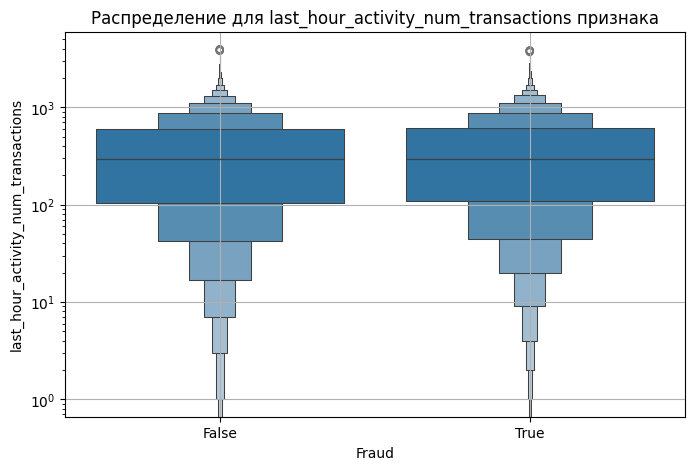

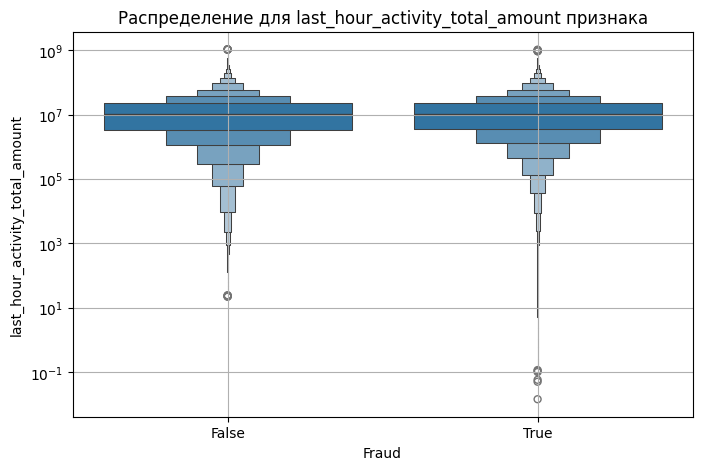

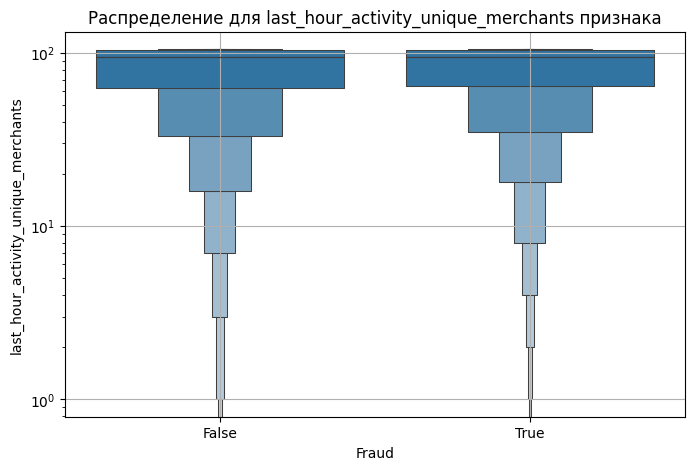

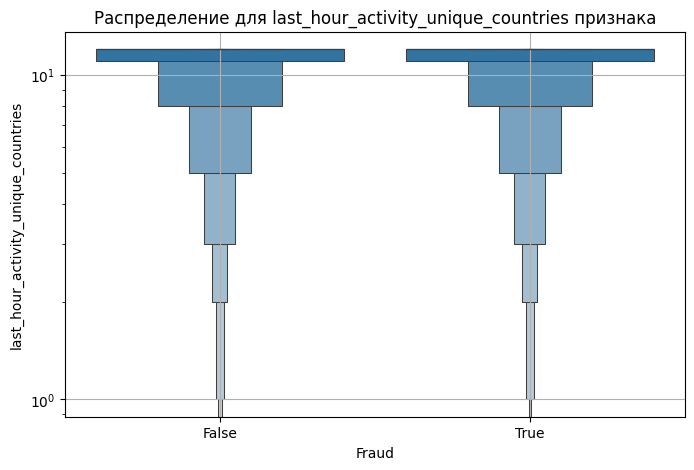

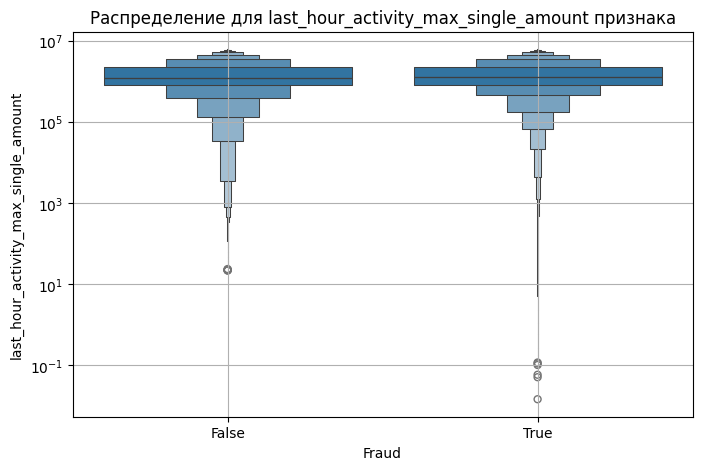

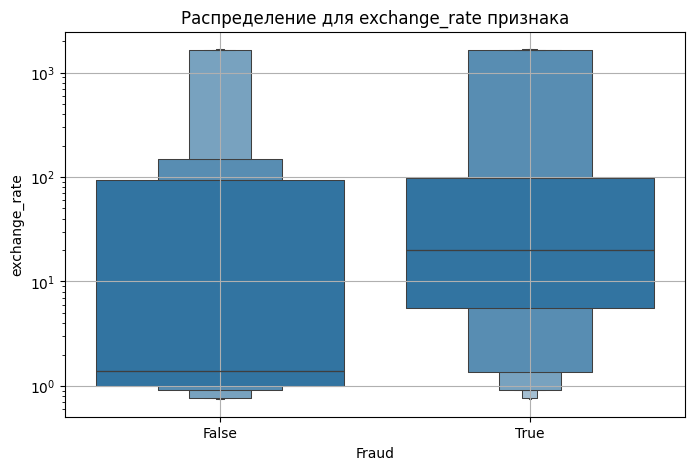

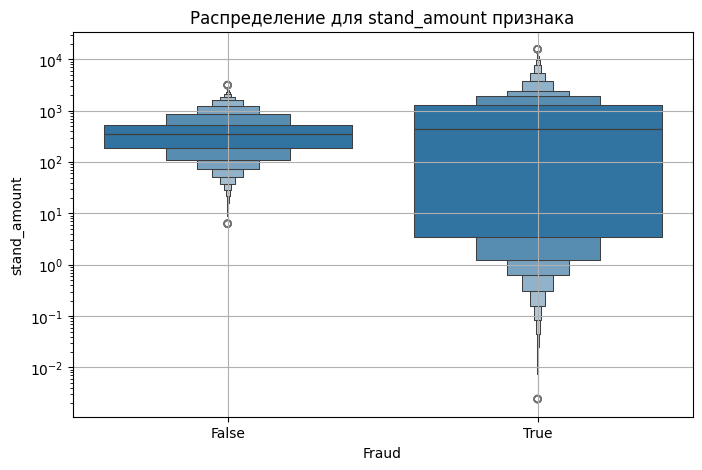

In [153]:
for col in num_cols:
    plt.figure(figsize=(8,5))
    sns.boxenplot(x="is_fraud", y=col, data=df)
    plt.title(f"Распределение для {col} признака")
    plt.xlabel("Fraud")
    plt.ylabel(col)
    plt.yscale('log')
    plt.grid()
    plt.show()


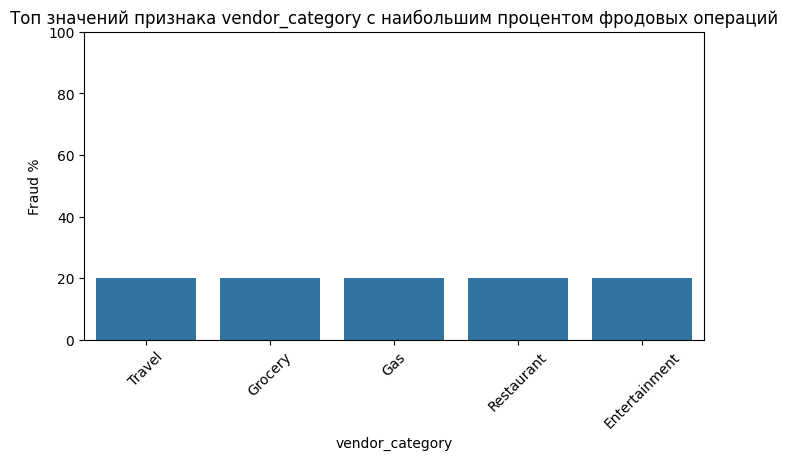

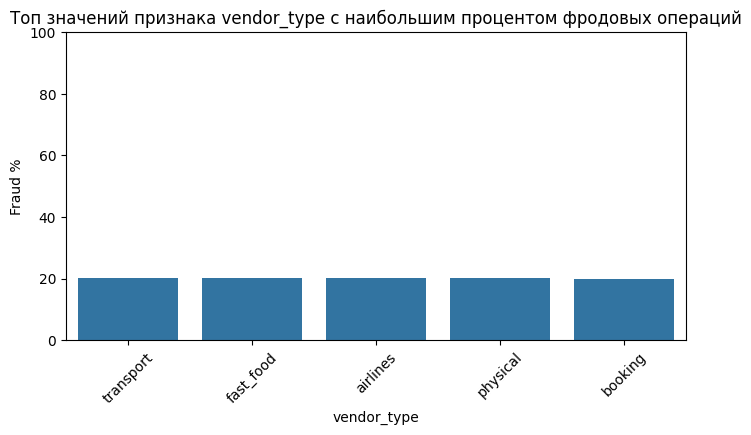

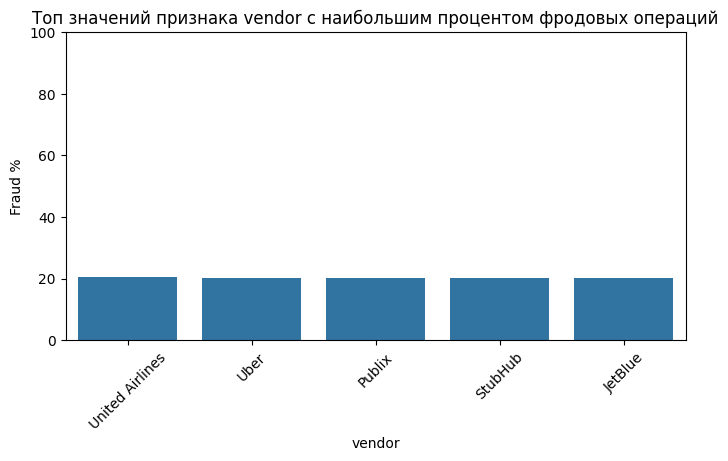

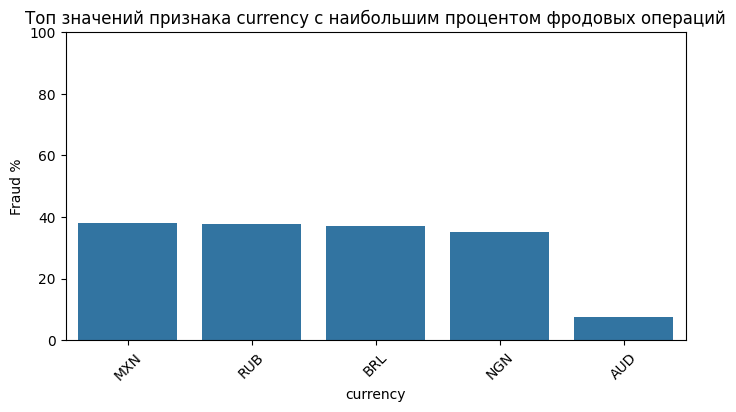

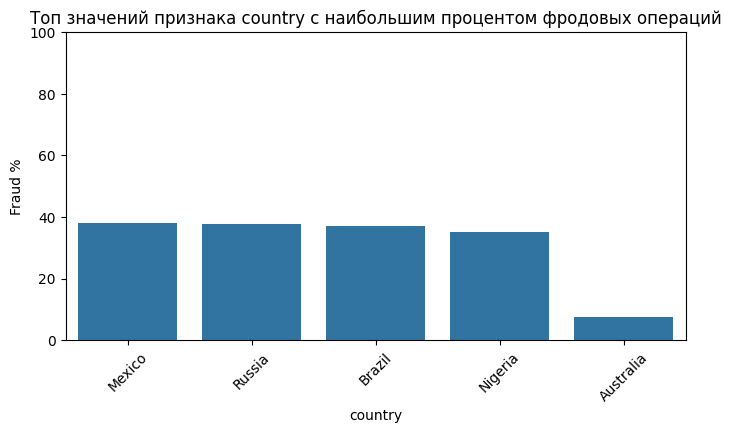

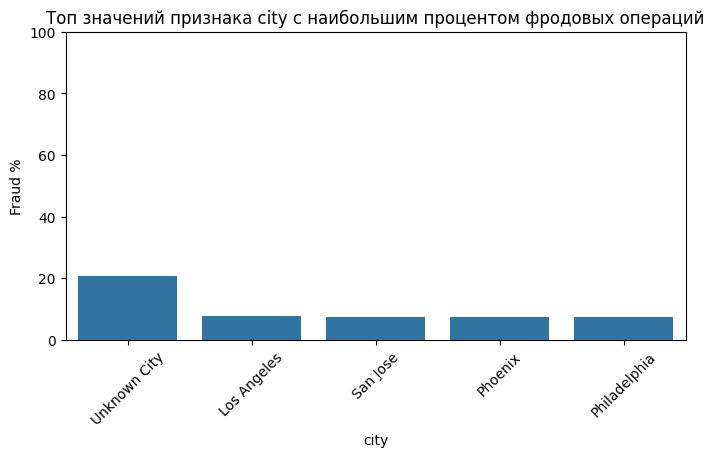

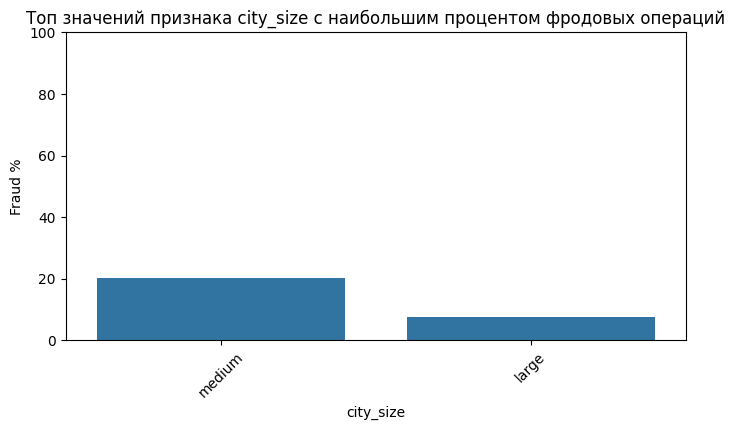

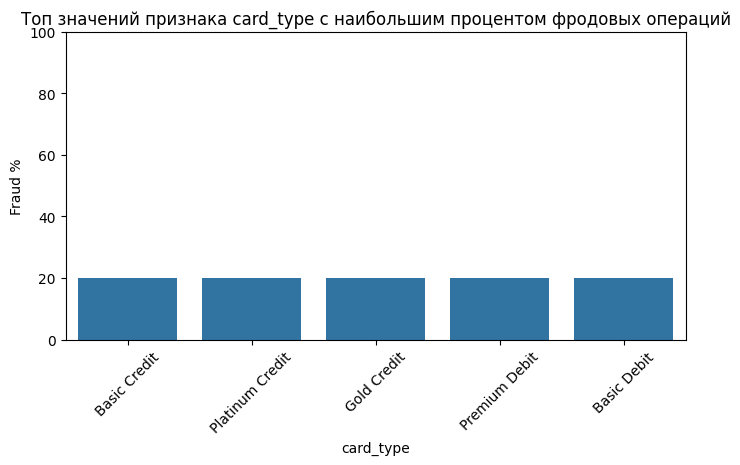

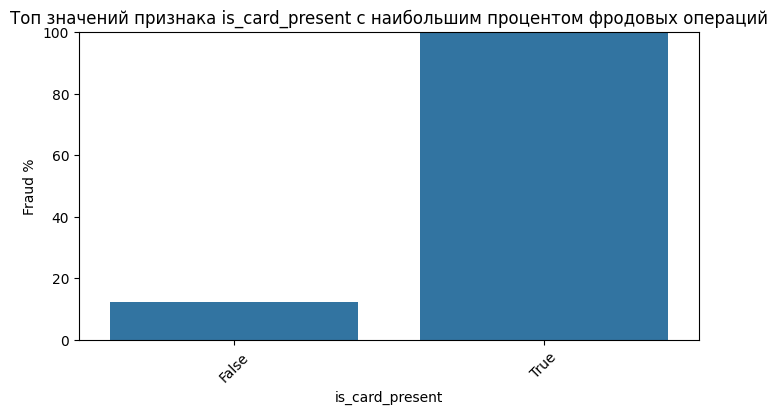

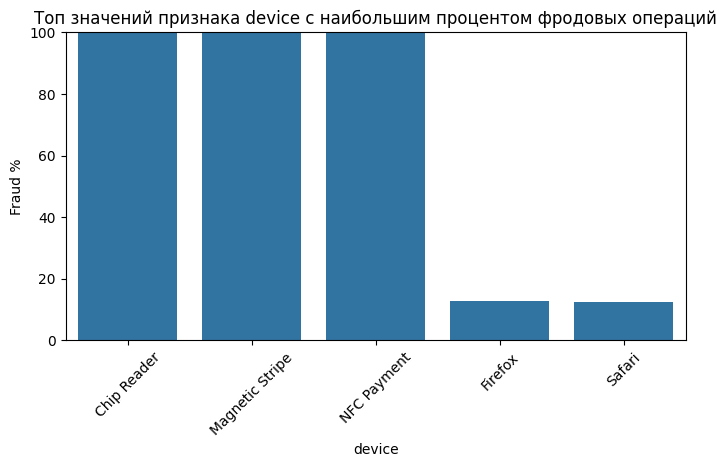

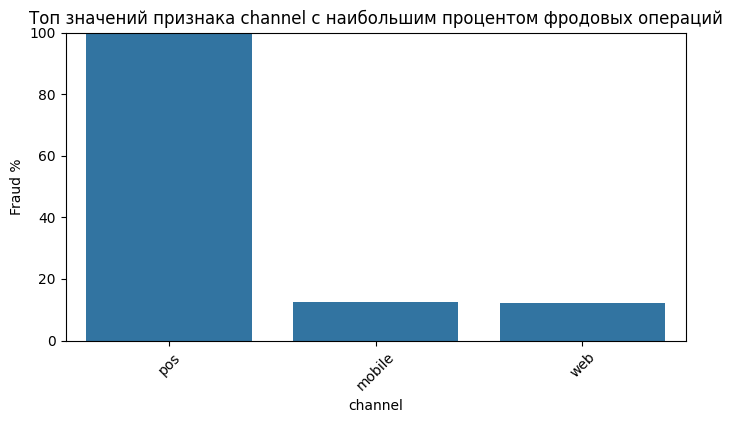

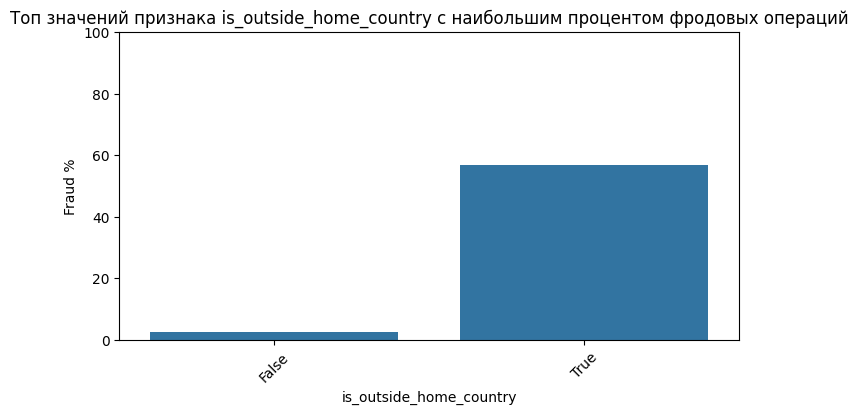

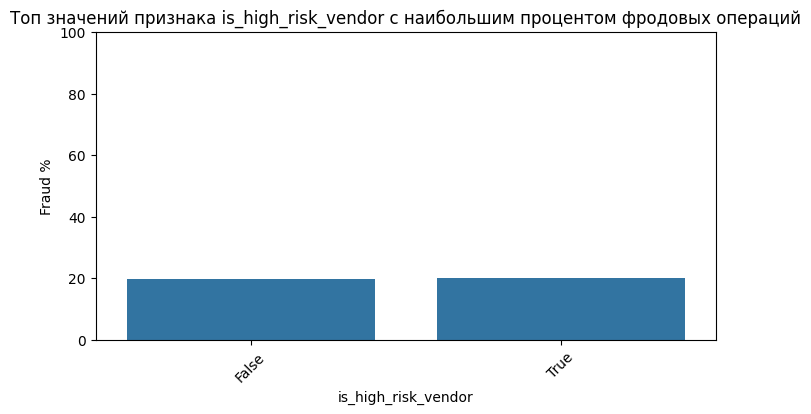

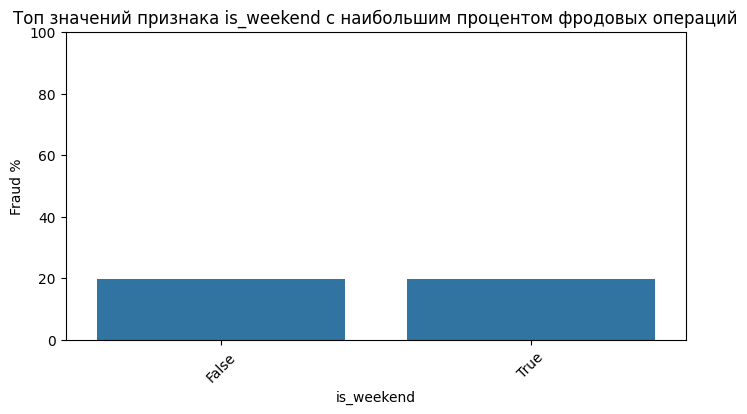

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt

cat_cols = df.select_dtypes(include=["object", "bool", "category"]).columns.drop(
    labels=["is_fraud", "customer_id", "device_fingerprint", "ip_address"], errors="ignore"
)
top_n = 5

for col in cat_cols:
    fraud_ratio = df.groupby(col)["is_fraud"].mean() * 100
    
    top_categories = fraud_ratio.nlargest(top_n)

    plt.figure(figsize=(8,4))
    sns.barplot(x=top_categories.index, y=top_categories.values)
    plt.ylabel("Fraud %")
    plt.xlabel(col)
    plt.title(f"Топ значений признака {col} с наибольшим процентом фродовых операций")
    plt.xticks(rotation=45)
    plt.ylim(0, 100)
    plt.show()


In [155]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

df['month'] = df['timestamp'].dt.month

df['weekday'] = df['timestamp'].dt.weekday

df['hour'] = df['timestamp'].dt.hour

In [156]:
df

,customer_id,card_number,timestamp,vendor_category,vendor_type,vendor,amount,currency,country,city,...,last_hour_activity_num_transactions,last_hour_activity_total_amount,last_hour_activity_unique_merchants,last_hour_activity_unique_countries,last_hour_activity_max_single_amount,exchange_rate,stand_amount,month,weekday,hour
0,CUST_72886,6646734767813109,2024-09-30 00:00:01.034820,Restaurant,fast_food,Taco Bell,294.87,GBP,UK,Unknown City,...,1197,3.349856e+07,105,12,1.925481e+06,0.747153,394.658011,9,0,0
1,CUST_70474,376800864692727,2024-09-30 00:00:01.764464,Entertainment,gaming,Steam,3368.97,BRL,Brazil,Unknown City,...,509,2.011476e+07,100,12,5.149117e+06,5.434649,619.905757,9,0,0
2,CUST_10715,5251909460951913,2024-09-30 00:00:02.273762,Grocery,physical,Whole Foods,102582.38,JPY,Japan,Unknown City,...,332,3.916385e+07,97,12,1.852242e+06,142.573268,719.506409,9,0,0
3,CUST_16193,376079286931183,2024-09-30 00:00:02.297466,Gas,major,Exxon,630.60,AUD,Australia,Unknown City,...,764,2.201260e+07,105,12,2.055798e+06,1.443654,436.808287,9,0,0
4,CUST_87572,6172948052178810,2024-09-30 00:00:02.544063,Healthcare,medical,Medical Center,724949.27,NGN,Nigeria,Unknown City,...,218,4.827636e+06,88,12,1.157231e+06,1668.736400,434.430069,9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7483761,CUST_11344,377055034743699,2024-10-30 23:59:58.926575,Retail,online,AliExpress,887.32,SGD,Singapore,Unknown City,...,1,1.521769e+03,1,1,8.873226e+02,1.323643,670.362079,10,2,23
7483762,CUST_38961,373625915641065,2024-10-30 23:59:58.950801,Grocery,physical,Kroger,356.06,EUR,France,Unknown City,...,0,3.560645e+02,0,0,3.560645e+02,0.923864,385.402905,10,2,23
7483763,CUST_75576,6702342842796660,2024-10-30 23:59:58.972155,Grocery,physical,Kroger,391.96,SGD,Singapore,Unknown City,...,0,3.919607e+02,0,0,3.919607e+02,1.323643,296.122166,10,2,23
7483764,CUST_82508,374615717295581,2024-10-30 23:59:58.996608,Retail,online,eBay,601.71,USD,USA,Chicago,...,2,1.474510e+03,2,1,6.017100e+02,1.000000,601.710000,10,2,23


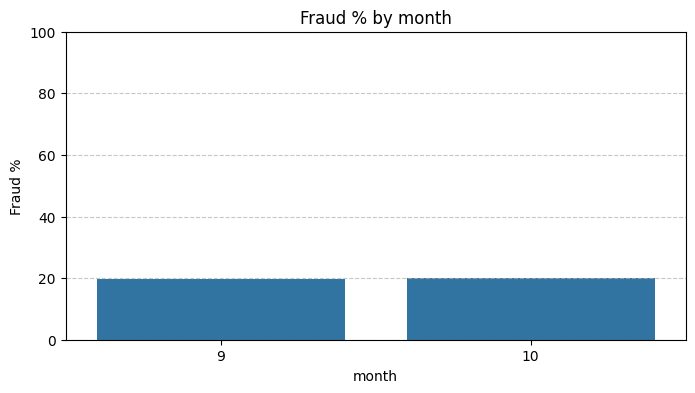

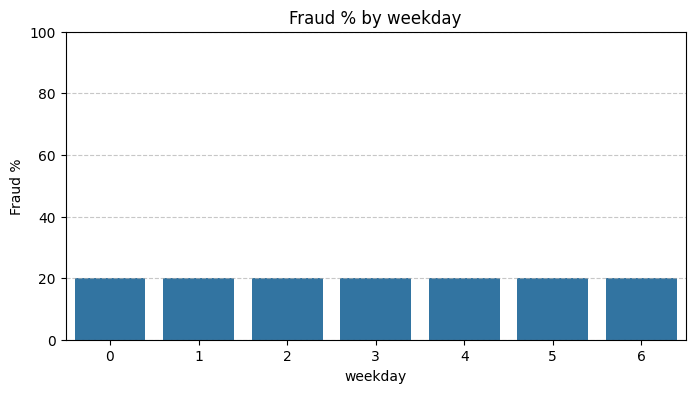

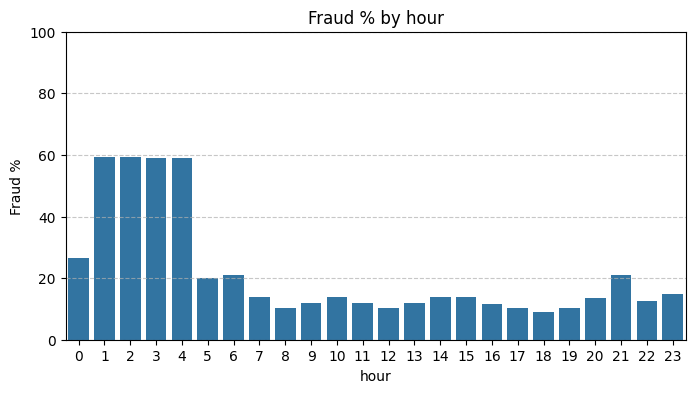

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

time_cols = ['month', 'weekday', 'hour']

for col in time_cols:
    fraud_ratio = df.groupby(col)['is_fraud'].mean() * 100

    plt.figure(figsize=(8,4))
    sns.barplot(x=fraud_ratio.index, y=fraud_ratio.values, legend=False)
    plt.ylabel("Fraud %")
    plt.xlabel(col)
    plt.title(f"Fraud % by {col}")
    plt.ylim(0, 100)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


Поиск клиентов-мошенников и "черных" ip-адресов 

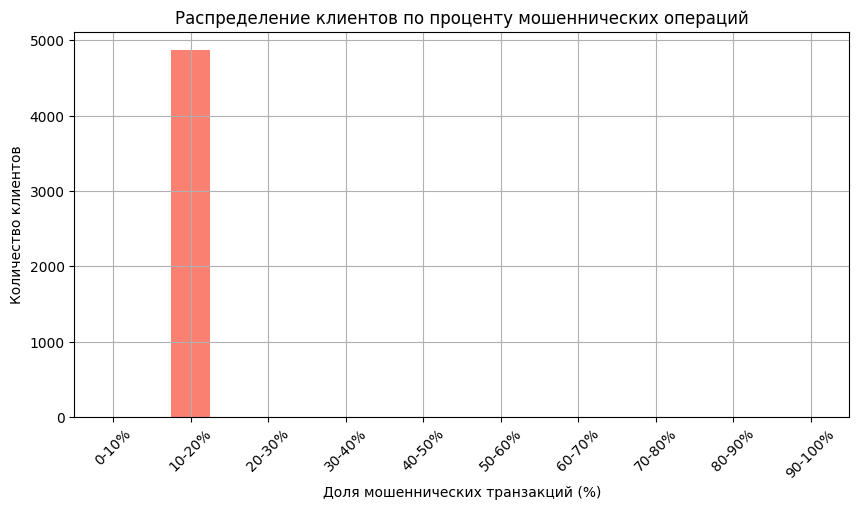

In [158]:
bins = np.arange(0, 110, 10)
labels = [f"{i}-{i+10}%" for i in bins[:-1]]

client_fraud_binned = pd.cut(df.groupby('customer_id')['is_fraud'].mean()*100,
                              bins=bins, labels=labels, include_lowest=True)

client_fraud_binned.value_counts().sort_index().plot(
    kind='bar', color='salmon', figsize=(10,5), grid=True
)
plt.xlabel("Доля мошеннических транзакций (%)")
plt.ylabel("Количество клиентов")
plt.title("Распределение клиентов по проценту мошеннических операций")
plt.xticks(rotation=45)
plt.show()

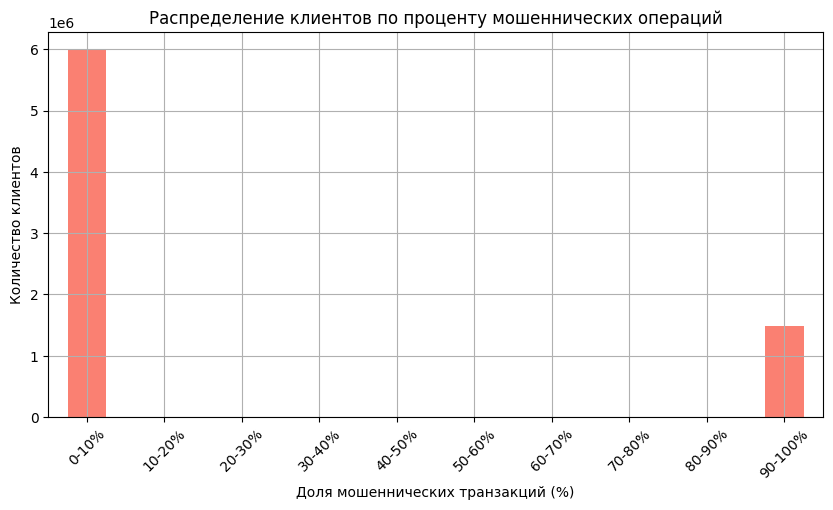

In [159]:
bins = np.arange(0, 110, 10)
labels = [f"{i}-{i+10}%" for i in bins[:-1]]

client_fraud_binned = pd.cut(df.groupby('ip_address')['is_fraud'].mean()*100,
                              bins=bins, labels=labels, include_lowest=True)

client_fraud_binned.value_counts().sort_index().plot(
    kind='bar', color='salmon', figsize=(10,5), grid=True
)
plt.xlabel("Доля мошеннических транзакций (%)")
plt.ylabel("Количество клиентов")
plt.title("Распределение клиентов по проценту мошеннических операций")
plt.xticks(rotation=45)
plt.show()

In [160]:
fraud_ratio_by_ip = df.groupby('ip_address')['is_fraud'].mean()
fraud_ratio_by_ip[fraud_ratio_by_ip == 1].to_csv('full_fraud_ip_addresses_list.csv', index=False)

Попробуем обучить модель

In [161]:
df.columns

Index(['customer_id', 'card_number', 'timestamp', 'vendor_category',
       'vendor_type', 'vendor', 'amount', 'currency', 'country', 'city',
       'city_size', 'card_type', 'is_card_present', 'device', 'channel',
       'device_fingerprint', 'ip_address', 'is_outside_home_country',
       'is_high_risk_vendor', 'is_weekend', 'is_fraud',
       'last_hour_activity_num_transactions',
       'last_hour_activity_total_amount',
       'last_hour_activity_unique_merchants',
       'last_hour_activity_unique_countries',
       'last_hour_activity_max_single_amount', 'exchange_rate', 'stand_amount',
       'month', 'weekday', 'hour'],
      dtype='object')

In [162]:
drop_cols = ['timestamp', 'customer_id', 'amount', 'device_fingerprint']

In [163]:
model_df = df.drop(columns=drop_cols)
model_df

,card_number,vendor_category,vendor_type,vendor,currency,country,city,city_size,card_type,is_card_present,...,last_hour_activity_num_transactions,last_hour_activity_total_amount,last_hour_activity_unique_merchants,last_hour_activity_unique_countries,last_hour_activity_max_single_amount,exchange_rate,stand_amount,month,weekday,hour
0,6646734767813109,Restaurant,fast_food,Taco Bell,GBP,UK,Unknown City,medium,Platinum Credit,False,...,1197,3.349856e+07,105,12,1.925481e+06,0.747153,394.658011,9,0,0
1,376800864692727,Entertainment,gaming,Steam,BRL,Brazil,Unknown City,medium,Platinum Credit,False,...,509,2.011476e+07,100,12,5.149117e+06,5.434649,619.905757,9,0,0
2,5251909460951913,Grocery,physical,Whole Foods,JPY,Japan,Unknown City,medium,Platinum Credit,False,...,332,3.916385e+07,97,12,1.852242e+06,142.573268,719.506409,9,0,0
3,376079286931183,Gas,major,Exxon,AUD,Australia,Unknown City,medium,Premium Debit,False,...,764,2.201260e+07,105,12,2.055798e+06,1.443654,436.808287,9,0,0
4,6172948052178810,Healthcare,medical,Medical Center,NGN,Nigeria,Unknown City,medium,Basic Debit,False,...,218,4.827636e+06,88,12,1.157231e+06,1668.736400,434.430069,9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7483761,377055034743699,Retail,online,AliExpress,SGD,Singapore,Unknown City,medium,Premium Debit,False,...,1,1.521769e+03,1,1,8.873226e+02,1.323643,670.362079,10,2,23
7483762,373625915641065,Grocery,physical,Kroger,EUR,France,Unknown City,medium,Platinum Credit,False,...,0,3.560645e+02,0,0,3.560645e+02,0.923864,385.402905,10,2,23
7483763,6702342842796660,Grocery,physical,Kroger,SGD,Singapore,Unknown City,medium,Premium Debit,False,...,0,3.919607e+02,0,0,3.919607e+02,1.323643,296.122166,10,2,23
7483764,374615717295581,Retail,online,eBay,USD,USA,Chicago,large,Basic Credit,False,...,2,1.474510e+03,2,1,6.017100e+02,1.000000,601.710000,10,2,23


In [164]:
X = model_df.drop(columns=['is_fraud'])
y = model_df['is_fraud']

In [165]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split

cat_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

train_pool = Pool(X_train, y_train, cat_features=cat_features)
valid_pool = Pool(X_valid, y_valid, cat_features=cat_features)

Learning rate set to 0.5
0:	test: 0.9831717	best: 0.9831717 (0)	total: 1.17s	remaining: 1m 55s
10:	test: 0.9918345	best: 0.9918345 (10)	total: 7.12s	remaining: 57.6s
20:	test: 0.9932678	best: 0.9932678 (20)	total: 12.4s	remaining: 46.6s
30:	test: 0.9937885	best: 0.9937885 (30)	total: 17.4s	remaining: 38.8s
40:	test: 0.9940937	best: 0.9940937 (40)	total: 22.6s	remaining: 32.5s
50:	test: 0.9943050	best: 0.9943050 (50)	total: 27.6s	remaining: 26.5s
60:	test: 0.9945361	best: 0.9945361 (60)	total: 32.8s	remaining: 21s
70:	test: 0.9947990	best: 0.9947990 (70)	total: 37.9s	remaining: 15.5s
80:	test: 0.9949201	best: 0.9949201 (80)	total: 42.8s	remaining: 10s
90:	test: 0.9950007	best: 0.9950007 (90)	total: 47.8s	remaining: 4.73s
99:	test: 0.9950809	best: 0.9950809 (99)	total: 52.4s	remaining: 0us

bestTest = 0.9950808636
bestIteration = 99



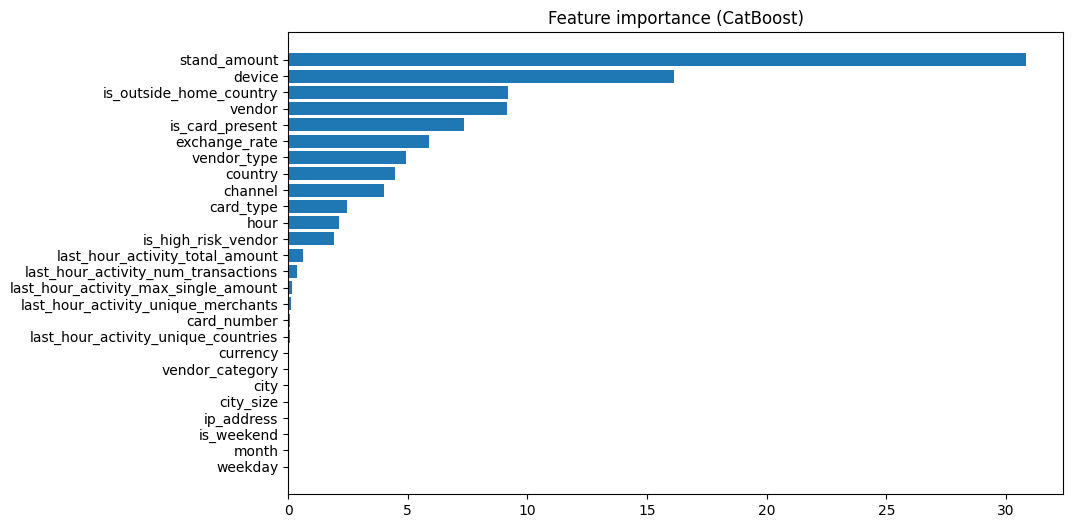

In [166]:
model = CatBoostClassifier(
    iterations=100,
    loss_function='Logloss',
    eval_metric='AUC',
    random_seed=42,
    verbose=10
)

model.fit(train_pool, eval_set=valid_pool, use_best_model=True)

feature_importances = model.get_feature_importance(train_pool)
fi_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})
fi_df = fi_df.sort_values(by="importance", ascending=False)

plt.figure(figsize=(10,6))
plt.barh(fi_df['feature'], fi_df['importance'])
plt.gca().invert_yaxis()
plt.title("Feature importance (CatBoost)")
plt.show()

Попробуем аптуну

In [171]:
drop_cols = ['timestamp', 'customer_id', 'amount', 'device_fingerprint', 'card_number', 'month', 'weekday', 'is_weekend', 'city_size', 'ip_address']

In [172]:
model_df = df.drop(columns=drop_cols)
model_df

,vendor_category,vendor_type,vendor,currency,country,city,card_type,is_card_present,device,channel,...,is_high_risk_vendor,is_fraud,last_hour_activity_num_transactions,last_hour_activity_total_amount,last_hour_activity_unique_merchants,last_hour_activity_unique_countries,last_hour_activity_max_single_amount,exchange_rate,stand_amount,hour
0,Restaurant,fast_food,Taco Bell,GBP,UK,Unknown City,Platinum Credit,False,iOS App,mobile,...,False,False,1197,3.349856e+07,105,12,1.925481e+06,0.747153,394.658011,0
1,Entertainment,gaming,Steam,BRL,Brazil,Unknown City,Platinum Credit,False,Edge,web,...,True,True,509,2.011476e+07,100,12,5.149117e+06,5.434649,619.905757,0
2,Grocery,physical,Whole Foods,JPY,Japan,Unknown City,Platinum Credit,False,Firefox,web,...,False,False,332,3.916385e+07,97,12,1.852242e+06,142.573268,719.506409,0
3,Gas,major,Exxon,AUD,Australia,Unknown City,Premium Debit,False,iOS App,mobile,...,False,False,764,2.201260e+07,105,12,2.055798e+06,1.443654,436.808287,0
4,Healthcare,medical,Medical Center,NGN,Nigeria,Unknown City,Basic Debit,False,Chrome,web,...,False,True,218,4.827636e+06,88,12,1.157231e+06,1668.736400,434.430069,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7483761,Retail,online,AliExpress,SGD,Singapore,Unknown City,Premium Debit,False,Safari,web,...,False,False,1,1.521769e+03,1,1,8.873226e+02,1.323643,670.362079,23
7483762,Grocery,physical,Kroger,EUR,France,Unknown City,Platinum Credit,False,Chrome,web,...,False,False,0,3.560645e+02,0,0,3.560645e+02,0.923864,385.402905,23
7483763,Grocery,physical,Kroger,SGD,Singapore,Unknown City,Premium Debit,False,Safari,web,...,False,False,0,3.919607e+02,0,0,3.919607e+02,1.323643,296.122166,23
7483764,Retail,online,eBay,USD,USA,Chicago,Basic Credit,False,Firefox,web,...,False,False,2,1.474510e+03,2,1,6.017100e+02,1.000000,601.710000,23


In [173]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split

cat_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)
X_valid, X_test, y_valid, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

train_pool = Pool(X_train, y_train, cat_features=cat_features)
valid_pool = Pool(X_valid, y_valid, cat_features=cat_features)
test_pool = Pool(X_test, y_test, cat_features=cat_features)

In [174]:
from sklearn.metrics import roc_auc_score
import optuna

def objective(trial):
    params = {
        "iterations": trial.suggest_int("iterations", 80, 100),
        "depth": trial.suggest_int("depth", 4, 6),
        "learning_rate": trial.suggest_float("learning_rate", 0.1, 0.3, log=True),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 0, 5),
        "loss_function": "Logloss",
        "eval_metric": "AUC",
        "random_seed": 42,
        "verbose": False,
        "class_weights": [1, (y == 0).sum() / (y == 1).sum()]
    }
    
    model = CatBoostClassifier(**params)
    model.fit(train_pool, eval_set=valid_pool, early_stopping_rounds=50, use_best_model=True)
    
    preds = model.predict_proba(X_test)[:, 1]
    return roc_auc_score(y_test, preds)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=5)

best_params = study.best_trial.params
best_params.update({"loss_function": "Logloss", "eval_metric": "AUC", "random_seed": 42, "verbose": 200})
final_model = CatBoostClassifier(**best_params)
final_model.fit(train_pool, eval_set=valid_pool, use_best_model=True)
preds = model.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, preds)

[I 2025-08-18 01:57:05,659] A new study created in memory with name: no-name-3aa81e98-e391-4cda-8984-a636dc30d085
[I 2025-08-18 01:57:51,742] Trial 0 finished with value: 0.992619885893334 and parameters: {'iterations': 93, 'depth': 4, 'learning_rate': 0.13986549302824164, 'l2_leaf_reg': 1.2667526178464972}. Best is trial 0 with value: 0.992619885893334.
[I 2025-08-18 01:58:39,193] Trial 1 finished with value: 0.9942277296883744 and parameters: {'iterations': 93, 'depth': 5, 'learning_rate': 0.26958583848100004, 'l2_leaf_reg': 3.9301688342450243}. Best is trial 1 with value: 0.9942277296883744.
[I 2025-08-18 01:59:27,691] Trial 2 finished with value: 0.9942730997124672 and parameters: {'iterations': 87, 'depth': 6, 'learning_rate': 0.2114463022695729, 'l2_leaf_reg': 1.3357811389308787}. Best is trial 2 with value: 0.9942730997124672.
[I 2025-08-18 02:00:06,523] Trial 3 finished with value: 0.9921433311502438 and parameters: {'iterations': 80, 'depth': 4, 'learning_rate': 0.108366257475

0:	test: 0.9830883	best: 0.9830883 (0)	total: 778ms	remaining: 1m 6s
86:	test: 0.9940399	best: 0.9940399 (86)	total: 38.6s	remaining: 0us

bestTest = 0.9940398889
bestIteration = 86



0.9950634767639037

In [176]:
final_model.save_model("catboost_model")